# 1. Load The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Load, Inspect & Interpret the Data in the CSV Files

(i). I Loaded the AviationData CSV file into the Jupyter Notebook as aviation_data:

In [55]:
aviation_data = pd.read_csv ('AviationData.csv', encoding = 'latin-1', low_memory = False)
# Display the first 5 rows of the Dataframe
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# Inspect the shape of the Dataframe
aviation_data.shape

print(f' This Dataframe has {aviation_data.shape[0]} rows')
print(f' This Dataframe has {aviation_data.shape[1]} columns')

 This Dataframe has 88889 rows
 This Dataframe has 31 columns


In [4]:
# Check the DataFrame's structure with .info() and print its contents

aviation_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Interpretation of Data displayed after printing out the info 


In [5]:
'''
The Dataframe has 31 columns and 88889 rows
The DataFrame has a mix of object(26) and float columns(5)
Some columns have missing values
'''

'\nThe Dataframe has 31 columns and 88889 rows\nThe DataFrame has a mix of object(26) and float columns(5)\nSome columns have missing values\n'

I also perfomed descriptive statistics on the Dataframe as displayed below

In [6]:
# Check out the descriptive statistics of the Dataframe
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# 3. Perfom Data Cleaning on the DataFrame

(i). First I created a copy of the DataFrame

In [7]:
aviation_data_copy = aviation_data.copy()
aviation_data_copy

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


(ii). I then dropped the duplicates present in the DataFrame

In [8]:
aviation_data_copy.drop_duplicates()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


(iii). I converted the dates to datetime format

In [9]:
# Convert Event.Date and Publication.Date to datetime format
aviation_data_copy["Event.Date"] = pd.to_datetime(aviation_data_copy["Event.Date"], errors="coerce")
aviation_data_copy["Publication.Date"] = pd.to_datetime(aviation_data_copy["Publication.Date"], errors="coerce")

# Check the result
aviation_data[['Event.Date', 'Publication.Date']].head()

,Event.Date,Publication.Date
0,1948-10-24,NaN
1,1962-07-19,19-09-1996
2,1974-08-30,26-02-2007
3,1977-06-19,12-09-2000
4,1979-08-02,16-04-1980


(iv). I then checked for missing values in the DataFrame

In [10]:
#Check for the columns with missing values and their sums using .isna() & .sum()

aviation_data_copy.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

(v). Below is an interpretation of the missing values and the steps to be taken for cleaning

In [11]:
'''
The Dataframe has so many missing values in the columns
The percentage of missing values varies for each column
Columns having more than 50% of missing values are to be dropped
Columns with less than 90% of missing values will have their rows dropped
Numerical columns with 50 % < missing values > 90 % will have the missing values replaced with mean
Categorical columns with 50 % < missing values > 90 % will have their missing values replaced with the mode
'''

'\nThe Dataframe has so many missing values in the columns\nThe percentage of missing values varies for each column\nColumns having more than 50% of missing values are to be dropped\nColumns with less than 90% of missing values will have their rows dropped\nNumerical columns with 50 % < missing values > 90 % will have the missing values replaced with mean\nCategorical columns with 50 % < missing values > 90 % will have their missing values replaced with the mode\n'

In [12]:
# Checking for the percentage of missing values
missing_percentage = (aviation_data_copy.isna().sum() / len(aviation_data_copy)) * 100
missing_percentage

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

In [13]:
# Drop columns with more than 50% missing values
aviation_data_copy = aviation_data_copy.drop(columns = ['Latitude', 'Longitude','Aircraft.Category','FAR.Description', 'Schedule','Air.carrier' ])
aviation_data_copy

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,2022-12-29
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,2022-12-27
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT


In [14]:
#Dropping Rows with Missing Values less than 90% in Specific Columns
aviation_data_copy = aviation_data_copy.dropna(subset = ['Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
                                               'Registration.Number','Amateur.Built', 'Make', 'Model', 'Engine.Type','Purpose.of.flight',
                                              'Total.Uninjured', 'Weather.Condition', 'Report.Status'])
aviation_data_copy

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,2001-06-11
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,PVT,Private,Non-Fatal,Substantial,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,NaN,The pilots failure to maintain control of the...,2022-12-20
88647,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,LZU,GWINNETT COUNTY - BRISCOE FLD,Non-Fatal,Substantial,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,NaN,An in-flight collision with a bird while on ap...,2022-12-20
88661,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,1F0,Ardmore Downtown Executive Air,Non-Fatal,Substantial,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,NaN,The pilot did not ensure adequate clearance fr...,2022-12-20
88735,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,EFD,ELLINGTON,Minor,Substantial,...,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,NaN,The pilots failure to secure the magneto swit...,2022-12-20


In [54]:
# Replacing Missing Values with a Placeholder in columns with 10 % < missing values < 50 %
aviation_data_copy.loc[:,['Airport.Code', 'Airport.Name']] = aviation_data_copy.loc[:,['Airport.Code', 'Airport.Name']].fillna('NaN')
aviation_data_copy

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [53]:
# Replace numerical columns with 50 % < missing values > 10 % with median
aviation_data_copy.loc[:,['Number.of.Engines','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']] = aviation_data_copy.loc[:,
    ['Number.of.Engines','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].fillna
(aviation_data_copy.loc[:,['Number.of.Engines','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].median())
aviation_data_copy

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,<bound method DataFrame.fillna of Numbe...,0.0,NaN,NaN,NaN,NaN


In [52]:
# Replace the missing values of the Broad.phase.of.flight & Publication.Date column with the mode

cols = ['Broad.phase.of.flight','Publication.Date']
aviation_data_copy.loc[:, cols] = aviation_data_copy.loc[:, cols].apply(lambda col: col.fillna(col.mode().iloc[0]))




In [18]:
# Confirm if the data is completely cleaned using the .isna() and .sum() 
aviation_data_copy.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [19]:
'''
The data is fully cleaned as the missing values were dealt with above
After dropping some rows and columns while cleaning, we reman with 25 columns and 71288 rows
Next step is visualizing the clean data achieved
'''

'\nThe data is fully cleaned as the missing values were dealt with above\nAfter dropping some rows and columns while cleaning, we reman with 25 columns and 71288 rows\nNext step is visualizing the clean data achieved\n'

# 3. Visualization of The Clean Data

In [20]:
aviation_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71288 entries, 0 to 88767
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                71288 non-null  object        
 1   Investigation.Type      71288 non-null  object        
 2   Accident.Number         71288 non-null  object        
 3   Event.Date              71288 non-null  datetime64[ns]
 4   Location                71288 non-null  object        
 5   Country                 71288 non-null  object        
 6   Airport.Code            71288 non-null  object        
 7   Airport.Name            71288 non-null  object        
 8   Injury.Severity         71288 non-null  object        
 9   Aircraft.damage         71288 non-null  object        
 10  Registration.Number     71288 non-null  object        
 11  Make                    71288 non-null  object        
 12  Model                   71288 non-null  object

(i). I first began by plotting a graph of number of accidents that each type of engine was involved in

<ipython-input-21-9f33b92992f2>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(engine_accidents.index, rotation=90)  # Rotate labels for readability


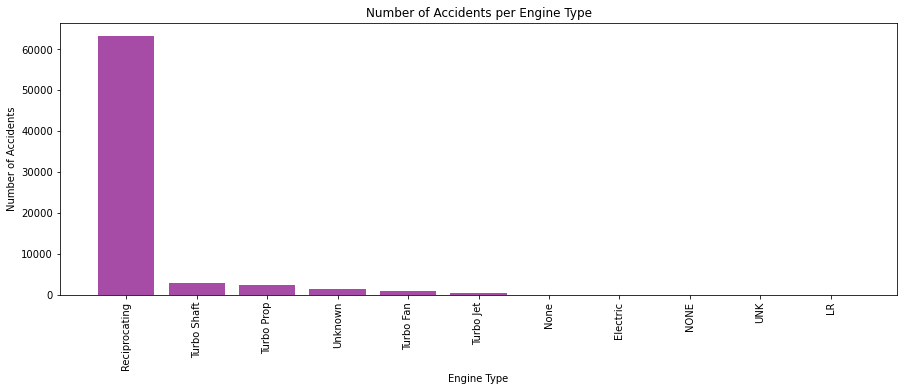

In [21]:
# Count occurrences of each engine type in accidents
engine_accidents = aviation_data_copy["Engine.Type"].value_counts()

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot bar chart
ax.bar(engine_accidents.index, engine_accidents.values, color='purple', alpha=0.7)

# Titles and labels
ax.set_title("Number of Accidents per Engine Type")
ax.set_xlabel("Engine Type")
ax.set_ylabel("Number of Accidents")
ax.set_xticklabels(engine_accidents.index, rotation=90)  # Rotate labels for readability

# Show plot
plt.show();


In [22]:
'''
- The graph above shows that aircrafts with reciprocating engines were involved in more accidents than any other type of engine
- It further shows that aircrafts with LR engines were least involved in accidents witha very insignificant value
- Recommendation is that when purchasing aircrafts it is advisable to go for aircrafts with engines that have been involved in less accidents.
'''

'\n- The graph above shows that aircrafts with reciprocating engines were involved in more accidents than any other type of engine\n- It further shows that aircrafts with LR engines were least involved in accidents witha very insignificant value\n- Recommendation is that when purchasing aircrafts it is advisable to go for aircrafts with engines that have been involved in less accidents.\n'

(ii). I then explored the Top 20 Aircraft Makes and bottom 20 makes by Number of Accidents

<ipython-input-50-3e2999a6de80>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_makes.index, rotation=90)  # Rotate x-axis labels for readability


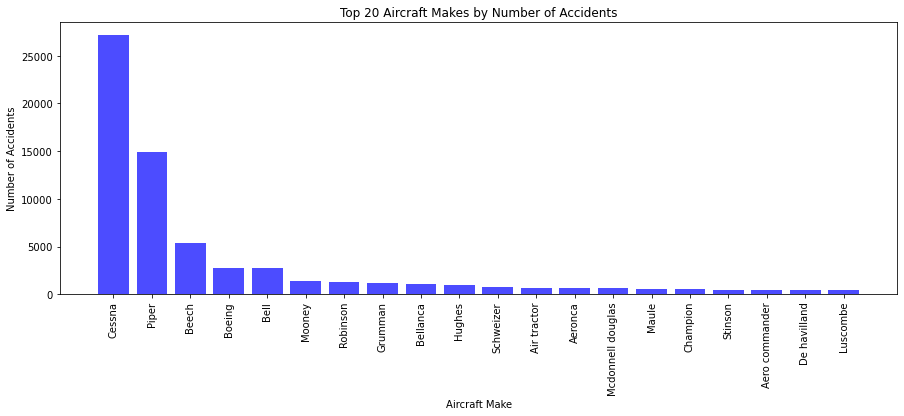

In [50]:
# Capitalize only the first letter of each value in "Make"
aviation_data_copy['Make'] = aviation_data_copy['Make'].str.capitalize()

# Count the number of accidents per aircraft make
top_makes = aviation_data_copy['Make'].value_counts().head(20)  # Get top 20

# Plot bar chart
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(top_makes.index, top_makes.values, color='blue', alpha=0.7)

# Titles and labels
ax.set_title('Top 20 Aircraft Makes by Number of Accidents')
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Number of Accidents')
ax.set_xticklabels(top_makes.index, rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.show()



<ipython-input-51-15a76e9a2a64>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_makes.index, rotation=90)  # Rotate x-axis labels for readability


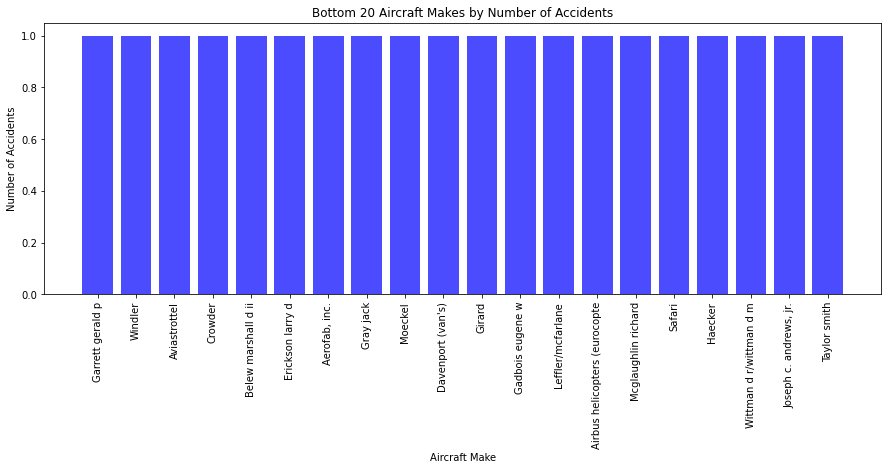

In [51]:
# Capitalize only the first letter of each value in "Make"
aviation_data_copy['Make'] = aviation_data_copy['Make'].str.capitalize()

# Count the number of accidents per aircraft make
top_makes = aviation_data_copy['Make'].value_counts().tail(20)  # Get bottom 20

# Plot bar chart
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(top_makes.index, top_makes.values, color='blue', alpha=0.7)

# Titles and labels
ax.set_title('Bottom 20 Aircraft Makes by Number of Accidents')
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Number of Accidents')
ax.set_xticklabels(top_makes.index, rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

In [25]:
'''
-The bar chart shows that in the top 20 aircraft makes that had accidents Cessna had the most followed by piper and the
 last one was North American.

- The bottom 20 aircraft makes included Bitonti, Exp acft assn chapter 60 and William d durkee e.t.c which 
  all had similar number of accidents.

- It is therefore advisable to look at the most probable causes of the very many accidents in Cessna before purchasing them
 or other makes can be considered for purchasing.
 

'''

'\n-The bar chart shows that in the top 20 aircraft makes that had accidents Cessna had the most followed by piper and the\n last one was North American.\n\n- The bottom 20 aircraft makes included Bitonti, Exp acft assn chapter 60 and William d durkee e.t.c which \n  all had similar number of accidents.\n\n- It is therefore advisable to look at the most probable causes of the very many accidents in Cessna before purchasing them\n or other makes can be considered for purchasing.\n \n\n'

(iii). I visualized the Flight phase against the Number of accidents

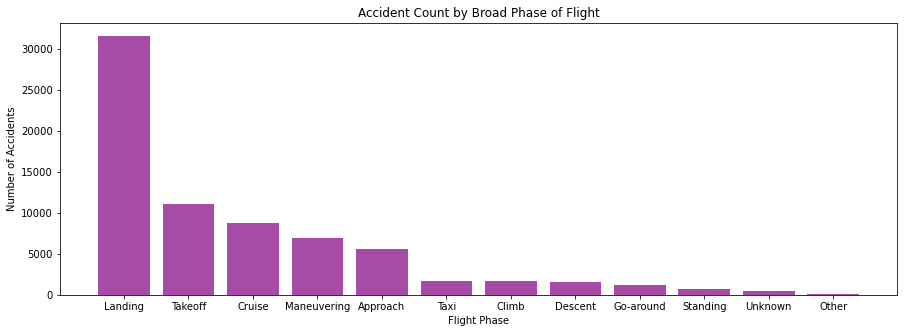

In [26]:
# Group data by 'Broad.phase.of.flight' and count occurrences
phase_accidents = aviation_data_copy["Broad.phase.of.flight"].value_counts()

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Create a horizontal bar chart
ax.bar(phase_accidents.index, phase_accidents.values, color='purple', alpha=0.7)

# Titles and labels
ax.set_title("Accident Count by Broad Phase of Flight")
ax.set_xlabel("Flight Phase")
ax.set_ylabel("Number of Accidents")

# Show plot
plt.show()


In [27]:
'''
-This bar chart shows that landing caused the highest number of accidents followed by Takeoff.
-Other factors caused the least number of accidents.
- It is therefore recommended that before venturing into the business, the company should ensure that pilots are well trained, 
   invest in aircraft with advanced landing systems, take off and engine redundancy.
'''

'\n-This bar chart shows that landing caused the highest number of accidents followed by Takeoff.\n-Other factors caused the least number of accidents.\n- It is therefore recommended that before venturing into the business, the company should ensure that pilots are well trained, \n   invest in aircraft with advanced landing systems, take off and engine redundancy.\n'

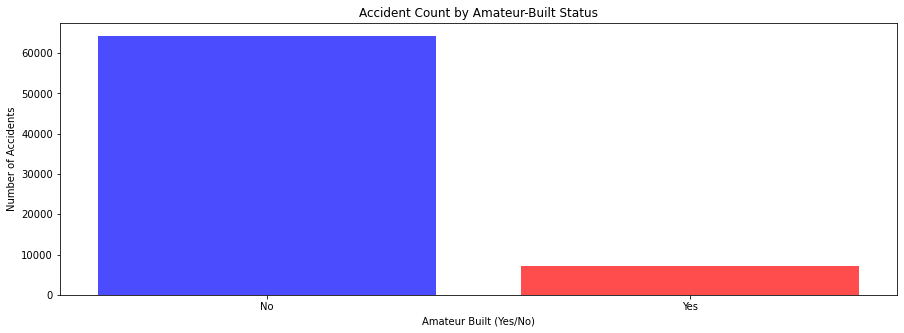

In [28]:
# Group by 'Amateur.Built' and count occurrences
amateur_accidents = aviation_data_copy["Amateur.Built"].value_counts()

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot a bar chart
ax.bar(amateur_accidents.index, amateur_accidents.values, color=['blue', 'red'], alpha=0.7)

# Titles and labels
ax.set_title("Accident Count by Amateur-Built Status")
ax.set_xlabel("Amateur Built (Yes/No)")
ax.set_ylabel("Number of Accidents")

# Show plot
plt.show()


In [29]:
'''
-The graph above reveals that aircrafts built by Amateurs had less accidents than the one not built by amateurs.
- This could suggest that if aircrafts made by amateurs are to be considered, well experienced technicians are required
  to manain them.
- Also models with strong safety regulations should be prioritized
'''

'\n-The graph above reveals that aircrafts built by Amateurs had less accidents than the one not built by amateurs.\n- This could suggest that if aircrafts made by amateurs are to be considered, well experienced technicians are required\n  to manain them.\n- Also models with strong safety regulations should be prioritized\n'

(iv). I visualized the top 20 locations that aircraft accidents were involved in Accidents

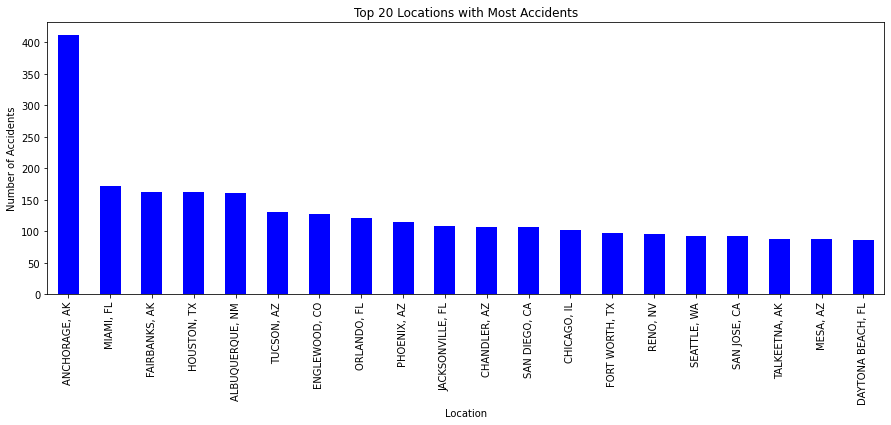

In [30]:
# Count accidents by location and select the top 20
aviation_data_copy['Location'].value_counts().head(20).plot(
    kind='bar', figsize=(15,5), color = 'blue')

# Add labels and title
plt.title('Top 20 Locations with Most Accidents')
plt.xlabel('Location')
plt.ylabel('Number of Accidents')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show();


In [31]:
'''
- The barchart above reveals that more accidents happened at Anchorage,AK; 400+ accidents
- The least accidents happened at Daytona Beach, FL; slightly above 100 accidents
- It is therefore recommended that when choosing routes, it is advisable that the aircrafts avoid routes like Anchorage,
  Miami, Houston e.t.c that have higher cases of accidents

'''

'\n- The barchart above reveals that more accidents happened at Anchorage,AK; 400+ accidents\n- The least accidents happened at Daytona Beach, FL; slightly above 100 accidents\n- It is therefore recommended that when choosing routes, it is advisable that the aircrafts avoid routes like Anchorage,\n  Miami, Houston e.t.c that have higher cases of accidents\n\n'

(v). I visualized the trend of different engine types involved in aviation accidents over the years.

<Figure size 1080x360 with 0 Axes>

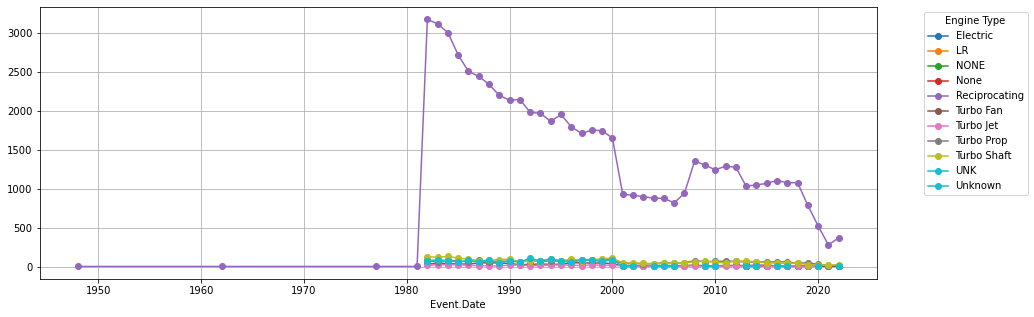

In [32]:
# Group data by year and engine type, then count occurrences
engine_trend = aviation_data_copy.groupby([aviation_data_copy['Event.Date'].dt.year, 'Engine.Type']).size().unstack()

# Create the line plot
plt.figure(figsize=(15, 5))
engine_trend.plot(kind='line', marker='o', figsize=(15, 5), colormap='tab10')

# Add labels and title
ax.set_title('Number of Accidents per Engine over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accidents')

# Add grid and legend
plt.grid(True)
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show();


In [33]:
'''
- Reciprocating engines have recorded the highest number of accidents than any other type of engine and its peak was on 1980
  where 3000+ accidents were recorded. However the number of accidents have been declining over time and the latest report was
  on 2022 where it recorded less than 500 accidents.
  
- The other types of engines have recorded significantly lower number of accidents from 1980 to 2022 with none recording more 
  than 500 accidents.
  
- It is therefore advisable that reciprocating enines are avoided.
'''

'\n- Reciprocating engines have recorded the highest number of accidents than any other type of engine and its peak was on 1980\n  where 3000+ accidents were recorded. However the number of accidents have been declining over time and the latest report was\n  on 2022 where it recorded less than 500 accidents.\n  \n- The other types of engines have recorded significantly lower number of accidents from 1980 to 2022 with none recording more \n  than 500 accidents.\n  \n- It is therefore advisable that reciprocating enines are avoided.\n'

(vi). I plotted a bar graph of Number of engines in an aircraft against the number of accidents

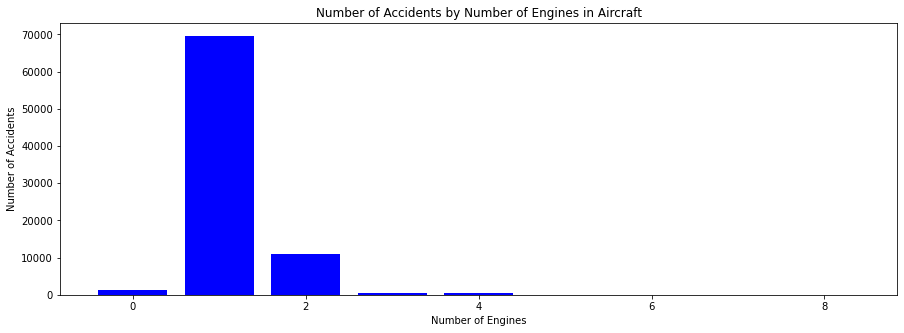

In [44]:
# Convert 'Number.of.Engines' to numeric
aviation_data_copy['Number.of.Engines'] = pd.to_numeric(aviation_data_copy['Number.of.Engines'],errors='coerce')

# Group by the number of engines and count accidents
engine_accident_count = aviation_data_copy['Number.of.Engines'].value_counts().sort_index()

# Create figure and axis with a defined size
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the bar chart with integer x-axis values
ax.bar(engine_accident_count.index.astype(int),engine_accident_count.values,color='blue')

# Titles and labels
ax.set_title('Number of Accidents by Number of Engines in Aircraft')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Number of Accidents')

plt.show()

In [ ]:
'''
- The grapgh above shows that aircrafts running on one engines were involved in most accidents as compared to planes
  running on multiple engines
'''

(vii). I plotted a bar graph of Accident count by weather condition

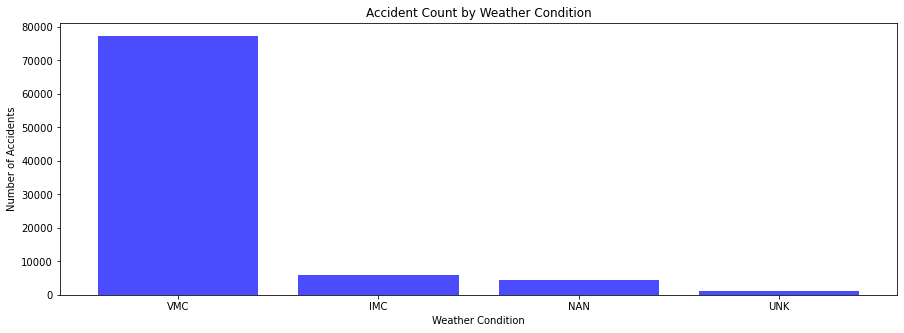

In [46]:
# Convert Weather Condition column to uppercase for consistency
aviation_data_copy["Weather.Condition"] = aviation_data_copy["Weather.Condition"].astype(str).str.upper()

# Group by Weather Condition and count occurrences
weather_accidents = aviation_data_copy["Weather.Condition"].value_counts()

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Create a bar chart
ax.bar(weather_accidents.index, weather_accidents.values, color= 'blue', alpha=0.7)

# Titles and labels
ax.set_title("Accident Count by Weather Condition")
ax.set_xlabel("Weather Condition")
ax.set_ylabel("Number of Accidents")

# Show plot
plt.show();


In [35]:
'''
VMC - Visual Meteorological Conditions
IMC - Instrument Meteorological Conditions
UNK - Uknown Weather Condition
- This dataset shows that most accidents occured in VMC; meaning that weather conditions was favourable and visuals were clear.
  This could mean that other factors such as mechanical problems, oro ther factors led to accidents.
- Recommendation is that Aircraft operating under VMC should prioritize pilot training, situational awareness, and air traffic 
  control coordination to reduce human error-related accidents.
'''

'\nVMC - Visual Meteorological Conditions\nIMC - Instrument Meteorological Conditions\nUNK - Uknown Weather Condition\n- This dataset shows that most accidents occured in VMC; meaning that weather conditions was favourable and visuals were clear.\n  This could mean that other factors such as mechanical problems, oro ther factors led to accidents.\n- Recommendation is that Aircraft operating under VMC should prioritize pilot training, situational awareness, and air traffic \n  control coordination to reduce human error-related accidents.\n'

(viii). I plotted a bar graph of the Injury Severity and their counts

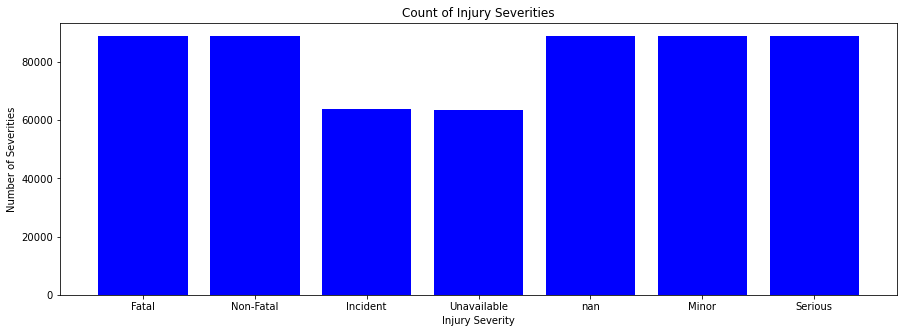

In [47]:
# Use regex to remove brackets and numbers in "Fatal(x)" and keep only "Fatal"
aviation_data_copy["Injury.Severity"] = aviation_data_copy["Injury.Severity"].astype(str).str.replace(r"Fatal\(\d+\)", "Fatal", regex=True)

# Verify the changes
#print(aviation_data["Injury.Severity"].value_counts())

#Create figure and axis with a defined size
fig, ax = plt.subplots(figsize = (15,5))

# Create a bar chart
ax.bar(aviation_data_copy["Injury.Severity"].values, aviation_data_copy["Injury.Severity"].index, color = 'blue')

# Titles and labels
ax.set_title('Count of Injury Severities')
ax.set_xlabel('Injury Severity')
ax.set_ylabel('Number of Severities')

#show plot
plt.show;


In [37]:
'''
In the total injuries that occured, Fatal,Non-Fatal,Minor,Serious were almost at par as compared to the incident and the unavailable

'''

'\nIn the total injuries that occured, Fatal,Non-Fatal,Minor,Serious were almost at par as compared to the incident and the unavailable\n\n'

In [ ]:
# Convert DataFrame to CSV and save it
aviation_data_copy.to_csv("AviationData_Cleaned.csv", index=False)